# K-Means Clustering

### Hyper/External Parameters

This code reads the training and test sets, created externally for a consistent evaluation of the examined methods, then creates $n$ clusters $\{C_i\}_{i=1}^n$ from the training data using the K-means algorithm with the usual Euclidean distance evaluated on the longitude and latitude coordinates of our dataframe.  

These implicitly create (closed) Voronoi cells
$$
K_n \triangleq \overline{
\left\{
x \in \mathbb{R}^d \mid \|\pi_2(x)- C_k\| \leq \|\pi_2(x)- C_j\|\; \text{for all}\; j \neq k
\right\}
},
$$
where $\pi_2:\mathbb{R}^d \to \mathbb{R}^2$ is the canonical projection onto the first $2$ coordiates.  In our dataframe, the first two coordinates are the longitude and latitude data.  Here, it makes sense to cluster using Eucldiean distance, whereas it may not be as meaningfull for other entries.

This defines a parition of $\mathbb{R}^d$.  

The test data-set are then set in their respective Voronoi sells.

In [1]:
# Number of Clusters
N_Clusters = 4

### Initialization(s)
#### Modules

In [2]:
# Basics
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# For K-Means
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# For DBSCALER
from sklearn.cluster import DBSCAN
from sklearn import metrics

# For Plotting
import matplotlib.pyplot as plt

# path expansion and existance checking
import os
from pathlib import Path

# Clustering
from sklearn.cluster import KMeans

# For Random Colouring
import random

#### Helper Functions

In [3]:
def check_path(path):
    path = os.path.expanduser(path)
    if not os.path.exists(path):
        Path(path).mkdir(parents=True, exist_ok=True)
    return(path)

#### Paths

In [4]:
# Data Path (Read)
#path_read = os.path.expanduser('/data/') 
#path_read = '/scratch/users/kratsioa/Desktop/data/'
# # Data Path (Write)
# #path_write = os.path.expanduser('/data/k_means/') 
#path_write = '/scratch/users/kratsioa/Desktop/Dropbox/branching/data/k_means/'

# Data Path (Read)
path_read = os.path.join('~', 'Dropbox', 'branching', 'data','Expert_split')
path_read = check_path(path_read)

# Data Path (Write)
path_write = os.path.join('~', 'Dropbox', 'branching', 'data', 'k_means/4_clusters/')
path_write = check_path(path_write)

#### Other Initialization

In [5]:
# Set Seed
random.seed(91215225251521258141515198)

# Read Data
data_file_path = os.path.join(path_read , 'bay.csv')
X_bay = pd.read_csv(data_file_path)
X_bay = X_bay.assign(dist='bay')
data_file_path = os.path.join(path_read , 'inland.csv')
X_inland = pd.read_csv(data_file_path)
X_inland = X_inland.assign(dist='inland')
data_file_path = os.path.join(path_read , 'nocean.csv')
X_nocean = pd.read_csv(data_file_path)
X_nocean = X_nocean.assign(dist='nocean')
data_file_path = os.path.join(path_read , 'oneHocean.csv')
X_oneHoncean = pd.read_csv(data_file_path)
X_oneHoncean = X_oneHoncean.assign(dist='oneHocean')
# Remove Total Bedrooms Columns
#X = X.drop(['total_bedrooms'],axis = 1)

#### Ensure train and test splits are same as other methods

In [6]:
# Build Train Set Split
X_train_bay = X_bay[X_bay['is_train']==True]
X_train_bay.reset_index(drop=True, inplace=True)
X_train_inland = X_inland[X_inland['is_train']==True]
X_train_inland.reset_index(drop=True, inplace=True)
X_train_oneHocean = X_oneHoncean[X_oneHoncean['is_train']==True]
X_train_oneHocean.reset_index(drop=True, inplace=True)
X_train_nocean = X_nocean[X_nocean['is_train']==True]
X_train_nocean.reset_index(drop=True, inplace=True)
X_train_List = [X_train_bay, X_train_inland,X_train_nocean,X_train_oneHocean]
## Join Train Set
X_train = pd.concat(X_train_List,axis=0)
X_train = pd.get_dummies(X_train)
# Shuffle
X_train = X_train.sample(frac=1)

# Build Train Set Split
X_test_bay = X_bay[X_bay['is_train']==False]
X_test_bay.reset_index(drop=True, inplace=True)
X_test_inland = X_inland[X_inland['is_train']==False]
X_test_inland.reset_index(drop=True, inplace=True)
X_test_oneHocean = X_oneHoncean[X_oneHoncean['is_train']==False]
X_test_oneHocean.reset_index(drop=True, inplace=True)
X_test_nocean = X_nocean[X_nocean['is_train']==False]
X_test_nocean.reset_index(drop=True, inplace=True)
X_test_List = [X_test_bay, X_test_inland,X_test_nocean,X_test_oneHocean]
## Join Test Set
X_test = pd.concat(X_test_List,axis=0)
X_test= pd.get_dummies(X_test)
X_test = X_test.sample(frac=1)

### Peform Clustering Algorithm

#### Preprocess

In [7]:
sc = StandardScaler()
X_train_coords = sc.fit_transform(X_train[['longitude','latitude','x1','x2','x3']])
X_test_coords = sc.transform(X_test[['longitude','latitude','x1','x2','x3']])

#### Selects Number of Clusters

In [8]:
sil = []
kmax = N_Clusters

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X_train_coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(X_train_coords, labels, metric = 'l1'))

# Number of Clusters
N_Clusters = N_Clusters

#### Defines Clusters

In [9]:
# Fit K_Means Clusters
kmeans = KMeans(n_clusters=N_Clusters, random_state=123).fit(X_train[['longitude','latitude']])
# Generate Lables
k_means_clusters_train = kmeans.predict(X_train[['longitude','latitude']])
k_means_clusters_test = kmeans.predict(X_test[['longitude','latitude']])

#### Perform Clustering and Visualization

0
1
2
3


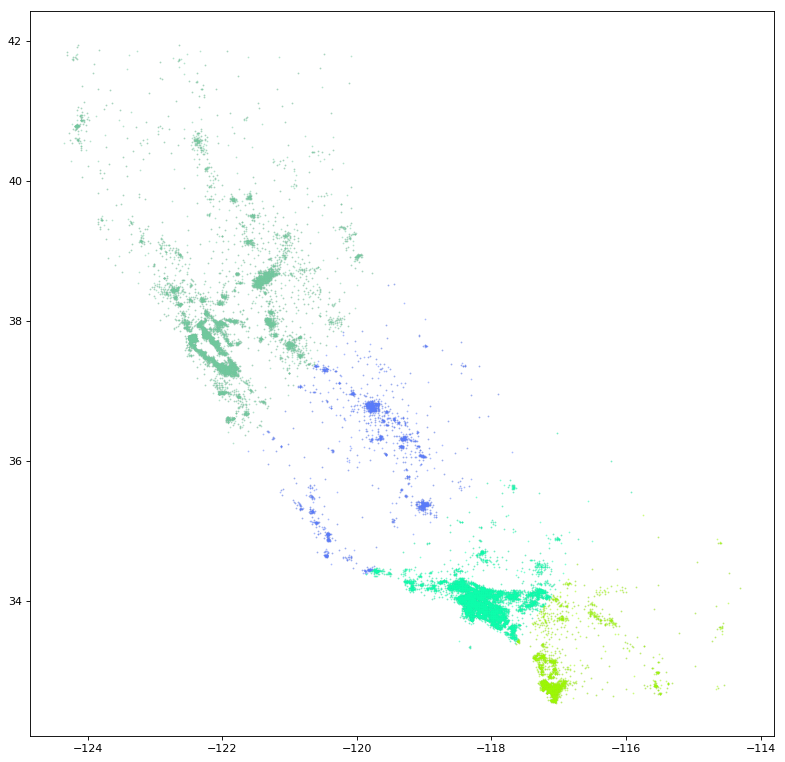

In [10]:
# ---------------------------------------------------------------#
# Initialize Plots
#---------------------------------------------------------------#
# Create data
x = X_train[['longitude']]
y = X_train[['latitude']]

# plot Full Dataset
s_plot_area = .3
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=s_plot_area, c='black', alpha=0.1)


# ---------------------------------------------------------------#
# Create Clusters
#---------------------------------------------------------------#
for current_cluster_index in range(N_Clusters):
    print(current_cluster_index)
    
    # Write Labels Determining Clusters
    Q_in_cluster_train = np.array((k_means_clusters_train==current_cluster_index),dtype = bool)
    Q_in_cluster_test = np.array((k_means_clusters_test==current_cluster_index),dtype = bool)


    # Define Trains Set For Cluster
    ## Determine Which Columns are in Cluster
    X_train_loop = pd.DataFrame(X_train.loc[Q_in_cluster_train])
    ## Label as Train or Test
    Q_Train_or_Test = pd.DataFrame(np.repeat(True,(X_train_loop.shape[0])),columns={'is_train'})
    Train_Cluster = pd.concat([X_train_loop.reset_index(),Q_Train_or_Test],axis=1)

    # Define Trains Set For Cluster
    ## Determine Which Columns are in Cluster
    X_test_loop = pd.DataFrame(X_test.loc[Q_in_cluster_test])
    ## Label as Train or Test
    Q_Train_or_Test = pd.DataFrame(np.repeat(False,(X_test_loop.shape[0])),columns={'is_train'})
    Test_Cluster = pd.concat([X_test_loop.reset_index(),Q_Train_or_Test],axis=1)

    ## Creat Dataframe
    current_cluster =pd.concat([Train_Cluster,Test_Cluster], axis = 0 )
    
    # Write Dummy Columns
    current_cluster = pd.get_dummies(current_cluster)

    # Write Partition Dataframe to CSV
    path_write_cluster = path_write + 'partition_' + str(current_cluster_index) + '.csv'
    current_cluster = current_cluster.drop(['index'], axis = 1)
    current_cluster.to_csv(path_write_cluster, index = False)
    
    #-------------------------------------------#
    # Update Plot
    #-------------------------------------------#
    # Initialize Current Colour-Vector
    partition_color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    # Plot Training Data For New Cluster
    x = current_cluster[['longitude']]
    y = current_cluster[['latitude']]
    current_partition_train = 'K' + str(current_cluster_index)
    ax1.scatter(x, y, s=s_plot_area, c=partition_color, alpha=0.5,label = str(current_cluster_index))
    
# Generate Plot
plt.show()